## Dependancies and supporting functions
Loading dependancies and supporting functions by running the code block below.

In [2]:
import torch
print(torch.__version__)

1.4.0


In [7]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

### Convolutional Neural networks 101

Convolution neural networks are one of the most succesfull types of neural networks for image recognition and an integral part of reigniting the interest in neural networks. They are able to `extract structural relations in the data such as spatial in images or temporal in time series`.

In this lecture we'll experiment with inserting 2D-convolution layers in the fully connected neural networks. We'll further experiment with stacking of `convolution layers`, `max pooling` and `strided convolutions` which are all important techniques in current convolution neural network architectures.

Lastly we'll try to visualize the learned convolution filters and try to understand what kind of features they learn to recognize.
If you haven't watched Jason Yosinski and colleague [awesome video on visualizing convolutional networks](https://www.youtube.com/watch?v=AgkfIQ4IGaM) you definitely should do so now.

If you are unfamilar with the the convolution operation https://github.com/vdumoulin/conv_arithmetic have a nice visualization of different convolution variants. 

For a more indepth tutorial please see 

- http://cs231n.github.io/convolutional-networks/  
- http://neuralnetworksanddeeplearning.com/chap6.html,  
- http://d2l.ai/chapter_convolutional-neural-networks/index.html

#### Reminder: What are convolutional networks?

ConvNets are in many respects very similar to the dense feedforward networks we saw previously:
 * The network is still organized into layers
 * Each layer is parameterized by weights and biases
 * Each layer has an element-wise non-linear transformation (activation function)
 * There are no cycles in the connections (more on this in later labs)

*So what is the difference?*
The networks we saw previously are called *dense* because each unit receives input from all the units in the previous layer.
This is not the case for ConvNets.
In ConvNets each unit is only connected to a small subset of the input units.
This is called the *receptive field* of the unit.

#### Let us look at a quick example.
The input (green matrix) is `1x5x5` dimensional tensor - i.e. it has one `channel` (like a grayscale image) and the map is of size `5x5`.
Let us define a `1x3x3` kernel (yellow submatrix).
The kernel weights are indicated by red in the bottom right of each elment.
The computation can be thought of as first an elementwise multiplication, and then summing the results.
Here we use a stride of 1, as shown in this animation:

<img src="images/convolutions.gif" style="width: 400px;"/> 
[GIF courtesy of [Stanford](http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution)]

After having convolved the image we perform an elementwise non-linear transformation on the *convolved features*.
In this example the input is a 2D *feature map* with depth 1.

<img src = 'https://www.dropbox.com/s/wpakft007rextc8/full_padding_no_strides_transposed.gif?dl=1' style="width: 200px;"/>

<img src = 'https://www.dropbox.com/s/5lt3dl148bftshg/padding_strides.gif?dl=1' style="width: 200px;"/>

## Assignment 1

### Assignment 1.1: Manual calculations

Perform the following computation, and write the result below.

![](images/conv_exe.png)

1. Manually convolve the input, and compute the convolved features. No padding and stride of 1.
1. Perform `2x2` max pooling on the convolved features. Stride of 2.

**Answer:**


### Assignment 1.2: Output dimensionality

Given the following 3D tensor input `(channel, height, width)` , a given amount (`channels_out`) of filters `(channels_in, filter_height, filter_width)`, stride `(height, width)` and padding `(height, width)`, calculate the output dimensionality if it's valid.

1. input tensor with dimensionality (1, 28, 28) and 16 filters of size (1, 5, 5) with stride (1, 1) and padding (0, 0)
 * **Answer:**  
2. input tensor with dimensionality (3, 32, 32) and 24 filters of size (2, 3, 3) with stride (1, 1) and padding (0, 0)
 * **Answer:** 
3. input tensor with dimensionality (10, 32, 32) and 3 filters of size (10, 2, 2) with stride (2, 2) and padding (0, 0)
 * **Answer:**  
4. input tensor with dimensionality (11, 8, 16) and 7 filters of size (11, 3, 3) with stride (2, 2) and padding (1, 1)
 * **Answer:**  
5. input tensor with dimensionality (128, 256, 256) and 112 filters of size (128, 3, 3) with stride (1, 1) and padding (1, 1)
 * **Answer:**  
 

### Recap >>> Convolutional Networks
<img src="https://www.dropbox.com/s/7sehh09tzq32xs8/Pooling_Simple_max.png?dl=1">


<img src = 'https://www.dropbox.com/s/bza4hvniibko2wl/conv_net.jpg?dl=1'>

### Data: MNIST

The code below downloads and loads the same MNIST dataset as before.
Note however that the data has a different shape this time, namely `(num_samples, num_channels, height, width)`.

In [4]:
!pip install wget

import wget
wget.download('https://github.com/berdakh/ROBT407/blob/master/mnist.npz')

In [8]:
data = np.load('mnist.npz')

In [9]:
## LOAD the mnist data
# To speed up training we'll only work on a subset of the data.
# Note that we reshape the data from 
#  (nsamples, num_features) = (nsamples, nchannels*rows*cols)
#    -> (nsamples, nchannels, rows, cols)
# in order to retain the spatial arrangements of the pixels
num_classes = 10

# define the number of (image) channels and rows, cols
nchannels, rows, cols = 1, 28, 28

#get the xtraining dataset 
x_train = data['X_train'][:10000].astype('float32')
x_train = x_train.reshape((-1, nchannels, rows, cols))
targets_train = data['y_train'][:10000].astype('int32')

# validation 
x_valid = data['X_valid'][:500].astype('float32')
x_valid = x_valid.reshape((-1, nchannels, rows, cols))
targets_valid = data['y_valid'][:500].astype('int32')

# test 
x_test = data['X_test'][:500].astype('float32')
x_test = x_test.reshape((-1, nchannels, rows, cols))
targets_test = data['y_test'][:500].astype('int32')

print("Information on dataset")
print("x_train", x_train.shape)

print("targets_train", targets_train.shape)
print("x_valid", x_valid.shape)

print("targets_valid", targets_valid.shape)
print("x_test", x_test.shape)

print("targets_test", targets_test.shape)

Information on dataset
x_train (10000, 1, 28, 28)
targets_train (10000,)
x_valid (500, 1, 28, 28)
targets_valid (500,)
x_test (500, 1, 28, 28)
targets_test (500,)


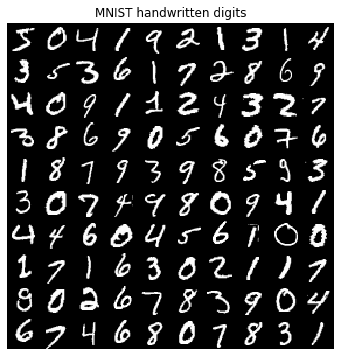

In [10]:
import matplotlib.pyplot as plt

#plot a few MNIST examples
idx, dim, classes = 0, 28, 10

# create empty canvas
canvas = np.zeros((dim*classes, classes*dim))

# fill with tensors
for i in range(classes):
    for j in range(classes):
        canvas[i*dim:(i+1)*dim, j*dim:(j+1)*dim] = x_train[idx].reshape((dim, dim))
        idx += 1
        
# visualize matrix of tensors as gray scale image
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.imshow(canvas, cmap='gray')
plt.title('MNIST handwritten digits')
plt.show()

## Define a simple feed forward neural network

In [2]:
import torch 
from torch.autograd import Variable
from torch.nn.parameter import Parameter

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import torch.nn.init as init

In [3]:
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if dev.type == 'cuda':
   print('Your GPU device name :', torch.cuda.get_device_name())        
else:
   print('No GPU Available :', dev)

Your GPU device name : GeForce GTX 1050 Ti


In [4]:
torch.nn.Module?

Init signature: torch.nn.Module()
Docstring:     
Base class for all neural network modules.

Your models should also subclass this class.

Modules can also contain other Modules, allowing to nest them in
a tree structure. You can assign the submodules as regular attributes::

    import torch.nn as nn
    import torch.nn.functional as F

    class Model(nn.Module):
        def __init__(self):
            super(Model, self).__init__()
            self.conv1 = nn.Conv2d(1, 20, 5)
            self.conv2 = nn.Conv2d(20, 20, 5)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            return F.relu(self.conv2(x))

Submodules assigned in this way will be registered, and will have their
parameters converted too when you call :meth:`to`, etc.
Init docstring: Initializes internal Module state, shared by both nn.Module and ScriptModule.
File:           ~/anaconda3/envs/mne/lib/python3.7/site-packages/torch/nn/modules/module.py
Type:           type
Subclasses:     Identity

In [5]:
# note that when you import from torch.nn you don't have to define and initialize
# the W1, b1, W2, b2, ..., Wn, bn weights 
from torch.nn import Linear, Conv2d, BatchNorm2d, MaxPool2d, Dropout2d
from torch.nn.functional import relu, elu, relu6, sigmoid, tanh, softmax

In [11]:
# hyperameters of the model
num_classes = 10

# channels here represent the depth of image (grayscale image)
channels = x_train.shape[1]
height   = x_train.shape[2]
width    = x_train.shape[3]

print(x_train.shape)
print(channels, height, width)

(10000, 1, 28, 28)
1 28 28


In [12]:
num_filters_conv1 = 16

kernel_size_conv1 = 5 # [height, width]
stride_conv1 = 1 # [stride_height, stride_width]

num_l1 = 100
padding_conv1 = 0
   
def compute_conv_dim(dim_size):
    return int((dim_size - kernel_size_conv1 + 2 * padding_conv1) / stride_conv1 + 1)

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()  
        
        self.l1_in_features = channels * height * width # 
        
        self.l_1 = Linear(in_features=self.l1_in_features,
                          out_features = num_l1, bias = True)        
        
        self.l_out = Linear(in_features = num_l1, 
                            out_features =num_classes, bias = False)           
        
    def forward(self, x): 
        # x.reshape(-1, 784)
        x = x.view(-1, self.l1_in_features)   
        x = self.l_1(x)
        x = relu(x)        
        x = self.l_out(x)
        x = softmax(x, dim=1)           
        return x

In [14]:
net = Net()
print(net)

Net(
  (l_1): Linear(in_features=784, out_features=100, bias=True)
  (l_out): Linear(in_features=100, out_features=10, bias=False)
)


In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [16]:
#Test the forward pass with dummy data
# five examples with a single channel (grayscale) of size 28 x 28 
x = np.random.normal(0,1, (5, 1, 28, 28)).astype('float32')
print(x.shape)

(5, 1, 28, 28)


In [17]:
# forward pass through the network 
out = net(Variable(torch.from_numpy(x)))
print(out.size())
print(out)

torch.Size([5, 10])
tensor([[0.0672, 0.1041, 0.1267, 0.1098, 0.0900, 0.1208, 0.1033, 0.0821, 0.0964,
         0.0997],
        [0.0982, 0.0981, 0.1828, 0.1330, 0.0927, 0.0855, 0.0766, 0.0791, 0.0740,
         0.0800],
        [0.1059, 0.1103, 0.0854, 0.1132, 0.1015, 0.1764, 0.0938, 0.0621, 0.0643,
         0.0872],
        [0.0623, 0.1072, 0.1595, 0.0853, 0.1078, 0.1070, 0.0870, 0.0782, 0.0974,
         0.1081],
        [0.1154, 0.1256, 0.0992, 0.0990, 0.1024, 0.1247, 0.0898, 0.0793, 0.0583,
         0.1064]], grad_fn=<SoftmaxBackward>)


Notice how the output's probabilities are nicely distributed.
The built-in nn functions (layers) alreay have a sane initialization of the weights.

In [28]:
# we could have done this ourselves, but we should be aware of sklearn and it's tools
from sklearn.metrics import accuracy_score

batch_size = 100
num_epochs = 50

num_samples_train = x_train.shape[0]
num_batches_train = num_samples_train // batch_size

num_samples_valid = x_valid.shape[0]
num_batches_valid = num_samples_valid // batch_size
print('Number of training sample at each batch >>>', num_batches_train)

Number of training sample at each batch >>> 100


In [31]:
def train(net, optimizer, num_epochs): 
    
    train_acc, train_loss = [], []
    valid_acc, valid_loss = [], []
    test_acc, test_loss = [], []
    cur_loss = 0
    losses = []    
    # at each batch get appropiate slice of the x_train data 
    get_slice = lambda i, size: range(i * size, (i + 1) * size)

    for epoch in range(num_epochs):
        # Forward -> Backprob -> Update params
        ## Train
        cur_loss = 0

        # set the module in training mode
        net.train()        
        #*****************************************************
        for i in range(num_batches_train):
            slce = get_slice(i, batch_size)
            x_batch = Variable(torch.from_numpy(x_train[slce]))
            
            # forward pass 
            output = net(x_batch)
           
            # compute gradients given loss
            target_batch = Variable(torch.from_numpy(targets_train[slce]).long())
            batch_loss = criterion(output, target_batch)
            
            # zero gradient + backpropogate 
            optimizer.zero_grad()
            batch_loss.backward()
            
            # update the gradient 
            optimizer.step()
            
            # update current loss 
            cur_loss += batch_loss  
            
        losses.append(cur_loss / batch_size)    
        
        # set the module in evaluation mode 
        net.eval()
        train_preds, train_targs = [], []
        #*****************************************************
        for i in range(num_batches_train):
            slce = get_slice(i, batch_size)
            x_batch = Variable(torch.from_numpy(x_train[slce]))
            
            # forward pass using the updated NN model 
            output = net(x_batch)
            preds = torch.max(output, 1)[1]
           
            # collect train targets 
            # collect train predicts 
            train_targs += list(targets_train[slce])
            train_preds += list(preds.data.numpy())
        
        ### Evaluate validation
        #*****************************************************
        val_preds, val_targs = [], []    
        for i in range(num_batches_valid):
            slce = get_slice(i, batch_size)
            x_batch = Variable(torch.from_numpy(x_valid[slce]))
            # forward pass validation dataset using the optimal model
            # (no update applied)
            output = net(x_batch)
            preds = torch.max(output, 1)[1]            
            val_preds += list(preds.data.numpy())
            val_targs += list(targets_valid[slce])
        train_acc_cur = accuracy_score(train_targs, train_preds)
        valid_acc_cur = accuracy_score(val_targs, val_preds)

        train_acc.append(train_acc_cur)
        valid_acc.append(valid_acc_cur)
        if epoch % 10 == 0:
            print("Epoch %2i : Train Loss %f , Train acc %f, Valid acc %f" % (
                    epoch+1, losses[-1], train_acc_cur, valid_acc_cur))
            
    epoch = np.arange(len(train_acc))
    plt.figure()
    plt.plot(epoch, train_acc, 'r', epoch, valid_acc, 'b')
    plt.legend(['Train Acc', 'Val Acc'])
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    ### Evaluate test set
    x_batch = Variable(torch.from_numpy(x_test))
    output = net(x_batch)
    preds = torch.max(output, 1)[1]
    print("\nTest set Acc:  %f" % (accuracy_score(list(targets_test), 
                                                  list(preds.data.numpy()))))

In [32]:
train(net, optimizer, num_epochs=100)

TypeError: can't convert CUDA tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

## Assignment 2

1. Note the performance of the standard feedforward neural network. Add a 2D convolution layer before the dense hidden layer and confirm that it increases the generalization performance of the network (try num_filters=16 and filter_size=5 as a starting point). 
 
2. Notice that the size of the image reduces. This can cause loss of information in convolutional networks that apply many convolutional layers. To avoid such add adequate padding to the convolutional layer.
 
3. Can the performance be increases even further by stacking more convolution layers ?
 
4. Maxpooling is a technique for decreasing the spatial resolution of an image while retaining the important features. Effectively this gives a local translational invariance and reduces the computation by a factor of four. In the classification algorithm which is usually desirable. Try to either: 
 
   - add a maxpool layer (add arguement kernel_size=2, stride=2) after the convolution layer, or
   - set add stride=2 to the arguments of the convolution layer, make it fit with the kernel size
     
  Verify that this decreases spatial dimension of the image (`print(l_conv_x.size())` or `print(l_maxpool_x.size())` in your forward pass). Does this increase the performance of the network (you may need to stack multiple layers or increase the number of filters to increase performance) ?

In [56]:
def compute_conv_dim(dim_size, kernel_size, padding, stride):
    return int((dim_size - kernel_size + 2 * padding) / stride + 1)

#### Task 1: 
Note the performance of the standard feedforward neural network. Add a 2D convolution layer before 
the dense hidden layer and confirm that it increases the generalization performance of the network 
(try num_filters=16 and filter_size=5 as a starting point).


In [57]:
# hyperameters of the model
num_classes = 10

channels = x_train.shape[1]
height = x_train.shape[2]
width = x_train.shape[3]

num_filters_conv1 = 16
kernel_size_conv1 = 5 # [height, width]
stride_conv1 = 1 # [stride_height, stride_width]

num_l1 = 100
padding_conv1 = 0

In [58]:
class CNN(nn.Module):    
    def __init__(self, channels, num_filters, kernel_size, padding=0, stride=1):        
        super(CNN, self).__init__()      
        
        # conv layer 
        self.conv_1 = Conv2d(in_channels = channels,
                            out_channels = num_filters,
                            kernel_size  = kernel_size,
                            stride       = stride,
                            padding      = padding)        
        
        # out_dim = (input_dim - filter_dim + 2*padding) / stride + 1
        self.conv_out_height = compute_conv_dim(height, kernel_size, padding, stride)
        self.conv_out_width  = compute_conv_dim(width, kernel_size, padding, stride)     
        
        # fully connected layer input dimensionality  
        self.l1_in_features = num_filters_conv1 * self.conv_out_height * self.conv_out_width
        
        # 1) layer 
        self.l_1 = Linear(in_features  = self.l1_in_features,
                          out_features = num_l1, bias=True)
        # 2) lAYER 
        self.l_out = Linear(in_features  = num_l1, 
                            out_features = num_classes,
                            bias=False)  
        
    def forward(self, x): # x.size() = [batch, channel, height, width]
        #x = x.cuda() # you can move the tensor to GPU         
        x = relu(self.conv_1(x))        
        x = x.view(-1, self.l1_in_features)
        
        x = relu(self.l_1(x))
        x = F.dropout(x)
        
        return softmax(self.l_out(x), dim=1)    

In [60]:
convnet = CNN(channels=channels, num_filters=16, kernel_size=5)
print(convnet)

CNN(
  (conv_1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (l_1): Linear(in_features=9216, out_features=100, bias=True)
  (l_out): Linear(in_features=100, out_features=10, bias=False)
)


Epoch  1 : Train Loss 0.219278 , Train acc 0.541000, Valid acc 0.468000
Epoch 11 : Train Loss 0.161086 , Train acc 0.874000, Valid acc 0.766000
Epoch 21 : Train Loss 0.154377 , Train acc 0.942000, Valid acc 0.818000
Epoch 31 : Train Loss 0.150672 , Train acc 0.966000, Valid acc 0.844000
Epoch 41 : Train Loss 0.149712 , Train acc 0.970000, Valid acc 0.848000
Epoch 51 : Train Loss 0.149180 , Train acc 0.980000, Valid acc 0.850000
Epoch 61 : Train Loss 0.148773 , Train acc 0.982000, Valid acc 0.872000
Epoch 71 : Train Loss 0.148274 , Train acc 0.982000, Valid acc 0.876000
Epoch 81 : Train Loss 0.147899 , Train acc 0.986000, Valid acc 0.874000
Epoch 91 : Train Loss 0.147832 , Train acc 0.985000, Valid acc 0.866000

Test set Acc:  0.888000


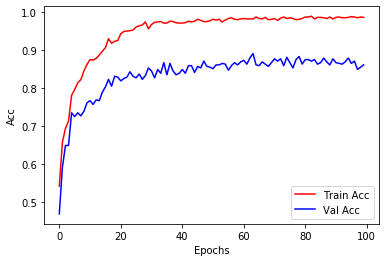

In [61]:
train(convnet, 
      optim.Adam(convnet.parameters(), lr=0.001), 
      num_epochs = 100)

Since we are using a kernel size of 5, we can retain the size our the input by using a padding of 2


In [68]:
convnet2 = CNN(channels=channels, num_filters=16, 
               kernel_size=5, padding=1)

In [ ]:
print(convnet2)

Epoch  1 : Train Loss 0.221401 , Train acc 0.403000, Valid acc 0.368000
Epoch 11 : Train Loss 0.164724 , Train acc 0.835000, Valid acc 0.758000
Epoch 21 : Train Loss 0.154361 , Train acc 0.920000, Valid acc 0.832000
Epoch 31 : Train Loss 0.151439 , Train acc 0.957000, Valid acc 0.842000
Epoch 41 : Train Loss 0.150947 , Train acc 0.969000, Valid acc 0.834000
Epoch 51 : Train Loss 0.149362 , Train acc 0.971000, Valid acc 0.856000
Epoch 61 : Train Loss 0.149012 , Train acc 0.974000, Valid acc 0.848000
Epoch 71 : Train Loss 0.148634 , Train acc 0.979000, Valid acc 0.860000
Epoch 81 : Train Loss 0.148544 , Train acc 0.979000, Valid acc 0.878000
Epoch 91 : Train Loss 0.148077 , Train acc 0.982000, Valid acc 0.854000
Epoch 101 : Train Loss 0.148065 , Train acc 0.976000, Valid acc 0.868000
Epoch 111 : Train Loss 0.147786 , Train acc 0.981000, Valid acc 0.870000
Epoch 121 : Train Loss 0.147652 , Train acc 0.990000, Valid acc 0.862000
Epoch 131 : Train Loss 0.147460 , Train acc 0.987000, Valid a

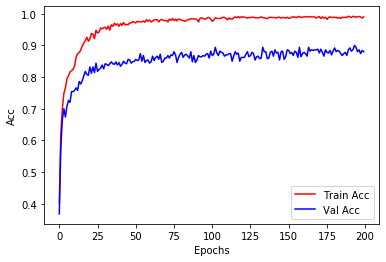

In [68]:
train(convnet2, optim.Adam(convnet2.parameters(), lr=0.001), 
      num_epochs=200)

### Can the performance be increased even further by stacking more convolution layers ?

In [71]:
class Conv2Net(nn.Module):    
    def __init__(self, channels, 
                 num_filters_1, 
                 num_filters_2,
                 num_filters_3,                 
                 kernel_size_1, 
                 kernel_size_2,
                 kernel_size_3,
                 
                 padding=0, 
                 stride=1):
        
        super(Conv2Net, self).__init__()        
        """
        num_classes = 10
        channels = x_train.shape[1]
        height = x_train.shape[2]
        width = x_train.shape[3]
        num_filters_conv1 = 16
        kernel_size_conv1 = 5 # [height, width]
        stride_conv1 = 1 # [stride_height, stride_width]
        num_l1 = 100
        padding_conv1 = 0
        """     
        
        # 1) convolutional layer 
        self.conv_1 = Conv2d(in_channels=channels,
                            out_channels=num_filters_1,
                            kernel_size =kernel_size_1,
                            stride=stride,
                            padding=padding)       
        
        # Conv layer 1 output dimensionality 
        self.conv_out_height = compute_conv_dim(height, kernel_size_1, padding, stride)
        self.conv_out_width  = compute_conv_dim(width, kernel_size_1, padding, stride)
        
        # 2) convolutional layer; Note that output from the previous; 
        #    convolution layer becomes input to the next one
        self.conv_2 = Conv2d(in_channels=num_filters_1,
                             out_channels=num_filters_2,
                             kernel_size=kernel_size_2,
                             stride=stride,padding=padding)
        
        # Conv layer 2 output dimensionality; 
        # Calculate the heigt and width again, based on the size of the first convolution
        # layer
        self.conv_out_height = compute_conv_dim(self.conv_out_height, kernel_size_2, padding, stride)
        self.conv_out_width  = compute_conv_dim(self.conv_out_width, kernel_size_2, padding, stride)

        self.conv_3 = Conv2d(in_channels =num_filters_2,
                             out_channels=num_filters_3,
                             kernel_size =kernel_size_3,
                             stride=stride,padding=padding)
        
        # Conv layer 2 output dimensionality; 
        # Calculate the heigt and width again, based on the size of the first convolution
        # layer
        self.conv_out_height = compute_conv_dim(self.conv_out_height, kernel_size_3, padding, stride)
        self.conv_out_width  = compute_conv_dim(self.conv_out_width,  kernel_size_3, padding, stride)

        
        # define the number of features == number of neurons in the fully connected layer 
        self.l1_in_features = num_filters_3 * self.conv_out_height * self.conv_out_width
        
        #) Fully connected hidden - layer 
        self.l_1 = Linear(in_features=self.l1_in_features, 
                          out_features=num_l1, # output of the hidden layer becomes input to the next one
                          bias=True)
        
        #) Fully connected output layer 
        self.l_out = Linear(in_features=num_l1, 
                            out_features=num_classes, # total number of classes here 10 
                            bias=False)
       
    def forward(self, x): 
        # x.size() = [batch, channel, height, width]        
        x = relu(self.conv_1(x))        
        x = relu(self.conv_2(x))        
        x = relu(self.conv_3(x))
        
        # flatteninig step 
        x = x.view(-1, self.l1_in_features)
        x = relu(self.l_1(x))        
        return softmax(self.l_out(x), dim=1)

In [72]:
import time 
# define the model 
conv2net = Conv2Net(channels=channels,
                    num_filters_1=16, 
                    num_filters_2=10, 
                    num_filters_3 = 5,
                    kernel_size_1 = 5, 
                    kernel_size_2 = 5, 
                    kernel_size_3 = 3,
                    padding=2)

Epoch  1 : Train Loss 0.229791 , Train acc 0.223000, Valid acc 0.234000
Epoch 11 : Train Loss 0.176035 , Train acc 0.701000, Valid acc 0.650000
Epoch 21 : Train Loss 0.175255 , Train acc 0.705000, Valid acc 0.652000
Epoch 31 : Train Loss 0.174909 , Train acc 0.708000, Valid acc 0.656000
Epoch 41 : Train Loss 0.159011 , Train acc 0.879000, Valid acc 0.792000
Epoch 51 : Train Loss 0.157443 , Train acc 0.885000, Valid acc 0.798000
Epoch 61 : Train Loss 0.157193 , Train acc 0.887000, Valid acc 0.794000
Epoch 71 : Train Loss 0.157152 , Train acc 0.887000, Valid acc 0.798000
Epoch 81 : Train Loss 0.157157 , Train acc 0.887000, Valid acc 0.800000
Epoch 91 : Train Loss 0.157140 , Train acc 0.888000, Valid acc 0.806000

Test set Acc:  0.822000
training time = 97.8 s


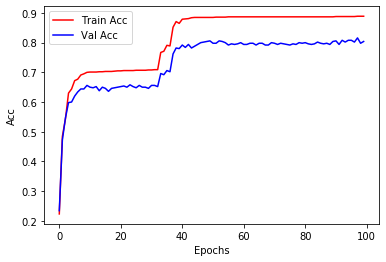

In [72]:
t = time.time()
# start the training 
train(conv2net, optim.Adam(conv2net.parameters(), lr=0.001), num_epochs=100)
print("training time = %0.1f s"%(time.time()-t))

#### TASK 
`Maxpooling` is a technique for decreasing the spatial resolution of an image while retaining the important features. Effectively this gives a local translational invariance and reduces the computation by a factor of four. In the classification algorithm which is usually desirable. 

`Try to either`:

- add a maxpool layer (add argument kernel_size=2, stride=2) after the convolution layer, or
- set add stride=2 to the arguments of the convolution layer, make it fit with the kernel size

Verify that this decreases spatial dimension of the image (print(l_conv_x.size()) or print(l_maxpool_x.size()) in your forward pass). Does this increase the performance of the network (you may need to stack multiple layers or increase the number of filters to increase performance) ?

`Answer:`

- The training is about 40-50s faster than without the max-pooling.

In [23]:
from IPython.core.debugger import set_trace

In [ ]:
class Conv2MaxPoolNet(nn.Module):       
    def __init__(self, channels, 
                 num_filters_1, 
                 num_filters_2, 
                 kernel_size_1, 
                 kernel_size_2, 
                 padding=0, 
                 stride=1, 
                 max_pool_size=2, 
                 max_pool_stride=2):
        
        super(Conv2MaxPoolNet, self).__init__()
        
        self.conv_1 = Conv2d(in_channels=channels,
                            out_channels=num_filters_1,
                            kernel_size=kernel_size_1,
                            stride=stride,
                            padding=padding)        
        
        self.conv_2 = Conv2d(in_channels=num_filters_1,
                            out_channels=num_filters_2,
                            kernel_size=kernel_size_2,
                            stride=stride,
                            padding=padding)        

        # you can define one maxpool and use it to pool any sequence of convolutional layers 
        self.max_pool = MaxPool2d(kernel_size=max_pool_size, stride=max_pool_stride)
        
        # NOTE: HEIGHT = HEIGHT/MAXPOOL_SIZE
        self.conv_out_height = int(compute_conv_dim(height, kernel_size_1, padding, stride)/max_pool_size)
        self.conv_out_width = int(compute_conv_dim(width, kernel_size_1, padding, stride)/max_pool_size)
        
        #Calculate the heigt and width again, based on the size of the first convolution layer
        self.conv_out_height = int(compute_conv_dim(self.conv_out_height, kernel_size_2, padding, stride)/max_pool_size)
        self.conv_out_width = int(compute_conv_dim(self.conv_out_width, kernel_size_2, padding, stride)/max_pool_size)    
        
        self.l1_in_features = num_filters_2 * self.conv_out_height * self.conv_out_width
        
        # fully connected 1st hidden layer 
        self.l_1 = Linear(in_features=self.l1_in_features,out_features=num_l1,bias=True)
        
        # fully connected output layer 
        self.l_out = Linear(in_features=num_l1, out_features=num_classes,bias=False)    
        self.n=0
        self.dropout = nn.Dropout2d(p=0.2)
        
    def forward(self, x): # x.size() = [batch, channel, height, width]
        #x = x.cuda()        
        if self.n < 1 : print(x.size())
        x = relu(self.max_pool(self.conv_1(x)))        
        """
        Conv2d, BatchNorm2d, MaxPool2d, Dropout2d
        relu, elu, relu6, sigmoid, tanh, softmax
        """        
        # set_trace()        
        
        if self.n < 1 : print(x.size())
        x = relu(self.max_pool(self.conv_2(x)))          

        if self.n < 1 : print(x.size())
        x = x.view(-1, self.l1_in_features)        
        #x = self.dropout(relu(self.l_1(x)))

        if self.n < 1 : print(x.size())
        x = relu(self.l_1(x))                
        
        self.n += 1
        if self.n < 1 : print(x.size())            
        x = softmax(self.l_out(x), dim =1)        
        if self.n < 1 : print(x.size())
            
        return x

In [ ]:
import time 
conv2maxpoolnet = Conv2MaxPoolNet(channels=channels, 
                                  num_filters_1=16, 
                                  num_filters_2=10, 
                                  kernel_size_1=5, 
                                  kernel_size_2=5, 
                                  padding=2)#.cuda()

t = time.time()
train(conv2maxpoolnet, 
      optim.Adam(conv2maxpoolnet.parameters(), lr=0.001), 
      num_epochs=100)

print("training time = %0.1f s"%(time.time()-t))

## Visualization of filters
Convolution filters can be interpreted as spatial feature detectors picking up different image features such as edges, corners etc. Below we provide code for visualization of the filters. The best results are obtained with fairly large filters of size 9 and either 16 or 36 filters. 

In [257]:
# to start with we print the names of the weights in our network
names_and_vars = {x[0]: x[1] for x in conv2maxpoolnet.named_parameters()}
print(names_and_vars.keys())


dict_keys(['conv_1.weight', 'conv_1.bias', 'conv_2.weight', 'conv_2.bias', 'l_1.weight', 'l_1.bias', 'l_out.weight'])


In [258]:
print(names_and_vars['l_1.weight'])
print(names_and_vars['l_1.weight'].shape)

Parameter containing:
tensor([[ 0.0490, -0.0487, -0.0502,  ...,  0.0328,  0.0808,  0.0165],
        [ 0.0010, -0.0193, -0.0007,  ..., -0.0366, -0.0263, -0.0039],
        [-0.0166, -0.0537,  0.0201,  ..., -0.0067,  0.1031,  0.1201],
        ...,
        [ 0.0144,  0.0407, -0.0287,  ...,  0.0399, -0.0692, -0.0014],
        [-0.0023, -0.0455, -0.0147,  ...,  0.0330,  0.0265, -0.0032],
        [-0.0188,  0.0166,  0.0509,  ...,  0.0652,  0.0029,  0.0586]],
       requires_grad=True)
torch.Size([100, 490])


(16, 1, 5, 5) i.e. the shape is (channels_out, channels_in, filter_height, filter_width)
learned filter values


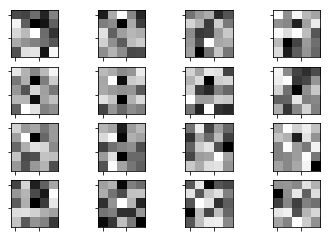

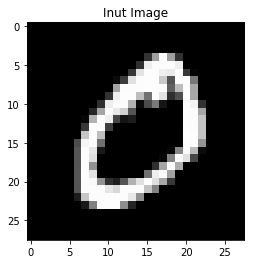

Response from input image convolved with the filters


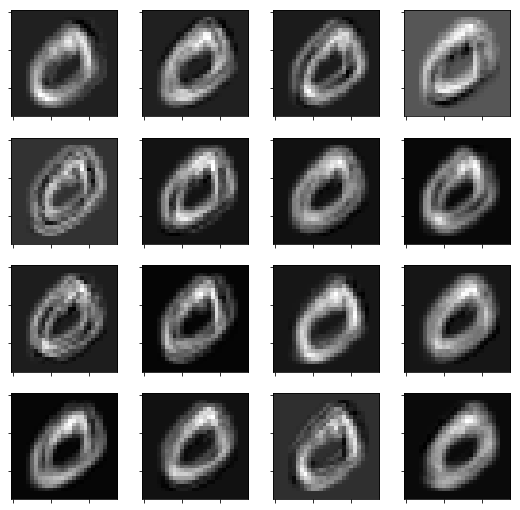

In [262]:
### ERROR - If you get a key error, 
#   then you need to define l_conv1 in your model!
if not 'conv_1.weight' in names_and_vars:
    print("You need to go back and define a convolutional layer in the network.")
else:
    
    # get the filter values from the first conv layer
    np_W = names_and_vars['conv_1.weight'].data.numpy()     
    print(np_W.shape, "i.e. the shape is (channels_out, channels_in, filter_height, filter_width)")    
    channels_out, channels_in, filter_size, _ = np_W.shape
    
    n = int(channels_out**0.5)

    # reshaping the last dimension to be n by n
    np_W_res = np_W.reshape(filter_size, filter_size, channels_in, n, n)
    fig, ax = plt.subplots(n,n)
    
    print("learned filter values")
    for i in range(n):
        for j in range(n):
            ax[i,j].imshow(np_W_res[:,:,0,i,j], cmap='gray',interpolation='none')
            ax[i,j].xaxis.set_major_formatter(plt.NullFormatter())
            ax[i,j].yaxis.set_major_formatter(plt.NullFormatter())

    idx = 1
    plt.figure()
    plt.imshow(x_train[idx,0],cmap='gray',interpolation='none')
    plt.title('Inut Image')
    plt.show()

    #visalize the filters convolved with an input image
    from scipy.signal import convolve2d
    np_W_res = np_W.reshape(filter_size, filter_size, channels_in, n, n)
    fig, ax = plt.subplots(n,n,figsize=(9,9))
    print("Response from input image convolved with the filters")
    
    for i in range(n):
        for j in range(n):
            ax[i,j].imshow(convolve2d(x_train[1,0],np_W_res[:,:,0,i,j], mode='same'),
                           cmap='gray',interpolation='none')
            ax[i,j].xaxis.set_major_formatter(plt.NullFormatter())
            ax[i,j].yaxis.set_major_formatter(plt.NullFormatter())

### Assignment 3

The visualized filters will likely look most like noise due to the small amount of training data.

1. Try to use 10000 traning examples instead and visualise the filters again
 
2. Dropout is a very usefull technique for preventing overfitting. Try to add a DropoutLayer after the convolution layer and hidden layer. This should increase both performance and the "visual appeal" of the filters
   - remember to use `net.train()` and `net.eval()` properly.
 
3. Batch normalization is a recent innovation for improving generalization performance. Try to insert batch normalization layers into the network to improve performance. 
   - remember to use `net.train()` and `net.eval()` properly.

In [126]:
x_train = data['X_train'].astype('float32')
x_train = x_train.reshape((-1, nchannels, rows, cols))
targets_train = data['y_train'].astype('int32')

x_valid = data['X_valid'].astype('float32')
x_valid = x_valid.reshape((-1, nchannels, rows, cols))
targets_valid = data['y_valid'].astype('int32')

x_test = data['X_test'].astype('float32')
x_test = x_test.reshape((-1, nchannels, rows, cols))
targets_test = data['y_test'].astype('int32')

print("Information on dataset")
print("x_train", x_train.shape)
print("targets_train", targets_train.shape)
print("x_valid", x_valid.shape)
print("targets_valid", targets_valid.shape)
print("x_test", x_test.shape)
print("targets_test", targets_test.shape)

Information on dataset
x_train (50000, 1, 28, 28)
targets_train (50000,)
x_valid (10000, 1, 28, 28)
targets_valid (10000,)
x_test (10000, 1, 28, 28)
targets_test (10000,)


In [ ]:
from torch.nn import Linear, Conv2d, BatchNorm2d, MaxPool2d, Dropout2d
from torch.nn.functional import relu, elu, relu6, sigmoid, tanh, softmax

In [24]:
Dropout2d?

Init signature: Dropout2d(p=0.5, inplace=False)
Docstring:     
Randomly zeroes whole channels of the input tensor.
The channels to zero-out are randomized on every forward call.

Usually the input comes from :class:`nn.Conv2d` modules.

As described in the paper
`Efficient Object Localization Using Convolutional Networks`_ ,
if adjacent pixels within feature maps are strongly correlated
(as is normally the case in early convolution layers) then i.i.d. dropout
will not regularize the activations and will otherwise just result
in an effective learning rate decrease.

In this case, :func:`nn.Dropout2d` will help promote independence between
feature maps and should be used instead.

Args:
    p (float, optional): probability of an element to be zero-ed.
    inplace (bool, optional): If set to ``True``, will do this operation
        in-place

Shape:
    - Input: :math:`(N, C, H, W)`
    - Output: :math:`(N, C, H, W)` (same shape as input)

Examples::

    >>> m = nn.Dropout2d(p=0.2)
    >

In [133]:
class Conv2MaxPoolNet(nn.Module):
    def __init__(self, channels, num_filters_1, num_filters_2, kernel_size_1, kernel_size_2, padding=0, stride=1
                 , max_pool_size=2, max_pool_stride=2):
        super(Conv2MaxPoolNet, self).__init__()
        
        self.conv_1 = Conv2d(in_channels=channels, out_channels=num_filters_1, kernel_size=kernel_size_1, stride=stride,
                            padding=padding)
                
        self.conv_2 = Conv2d(in_channels=num_filters_1, out_channels=num_filters_2, kernel_size=kernel_size_2, stride=stride,
                            padding=padding)
        
        self.max_pool = MaxPool2d(kernel_size=max_pool_size, stride=max_pool_stride)
        
        self.conv_out_height = int(compute_conv_dim(height, kernel_size_1, padding, stride)/max_pool_size)
        self.conv_out_width = int(compute_conv_dim(width, kernel_size_1, padding, stride)/max_pool_size)
        
        #Calculate the heigt and width again, based on the size of the first convolution layer
        self.conv_out_height = int(compute_conv_dim(self.conv_out_height, kernel_size_2, padding, stride)/max_pool_size)
        self.conv_out_width = int(compute_conv_dim(self.conv_out_width, kernel_size_2, padding, stride)/max_pool_size)
        
        self.l1_in_features = num_filters_2 * self.conv_out_height * self.conv_out_width
        
        self.l_1 = Linear(in_features=self.l1_in_features, out_features=num_l1, bias=True)
        self.l_out = Linear(in_features=num_l1, out_features=num_classes, bias=False)
    
        self.dropout = Dropout2d(p=0.3)
        self.n=0
        
    def forward(self, x): # x.size() = [batch, channel, height, width]
        #x = x.cuda()
        
        if self.n<1 : print(x.size())
        x = relu(self.max_pool(self.conv_1(x)))
        
        if self.n<1 : print(x.size())
        x = relu(self.max_pool(self.conv_2(x)))
        
        if self.n<1 : print(x.size())
        x = x.view(-1, self.l1_in_features)
        
        x = self.dropout(relu(self.l_1(x)))

        self.n += 1
        return softmax(self.l_out(x), dim=1)

torch.Size([100, 1, 28, 28])
torch.Size([100, 16, 14, 14])
torch.Size([100, 10, 7, 7])
Epoch  1 : Train Loss 0.229669 , Train acc 0.349000, Valid acc 0.336000
Epoch 11 : Train Loss 0.167327 , Train acc 0.830000, Valid acc 0.768000
Epoch 21 : Train Loss 0.156007 , Train acc 0.944000, Valid acc 0.870000
Epoch 31 : Train Loss 0.151889 , Train acc 0.960000, Valid acc 0.910000
Epoch 41 : Train Loss 0.150329 , Train acc 0.970000, Valid acc 0.914000
Epoch 51 : Train Loss 0.148649 , Train acc 0.982000, Valid acc 0.928000
Epoch 61 : Train Loss 0.148576 , Train acc 0.986000, Valid acc 0.914000
Epoch 71 : Train Loss 0.147848 , Train acc 0.988000, Valid acc 0.928000
Epoch 81 : Train Loss 0.147378 , Train acc 0.990000, Valid acc 0.926000
Epoch 91 : Train Loss 0.147420 , Train acc 0.990000, Valid acc 0.932000

Test set Acc:  0.943900
training time = 216.4 s


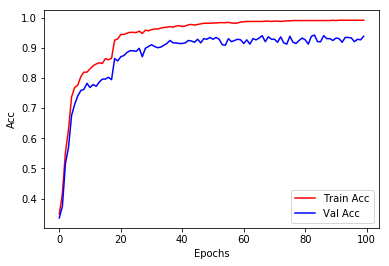

In [135]:
conv2maxpoolnet = Conv2MaxPoolNet(channels=channels, num_filters_1=16, num_filters_2=10, 
                                  kernel_size_1=5, kernel_size_2=5, padding=2) 

t = time.time()
train(conv2maxpoolnet, optim.Adam(conv2maxpoolnet.parameters(), lr=0.001), num_epochs=100)

print("training time = %0.1f s"%(time.time()-t))

Again, if you didn't already, you really should [watch this video](https://www.youtube.com/watch?v=AgkfIQ4IGaM).